In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import util as util


In [2]:
df=pd.read_csv("C://Users//HP//Downloads//output_data.csv")
df

,Timestamp,DeviceID,OC,OT,PC
0,1717180257962,e77b973a-b7c9-4113-8598-4e85be9a8b34,763,1878,2093
1,1717180333401,19083212-f248-48f5-b7c2-1902d366da74,1682,2286,2756
2,1717180333482,26fef3fe-5c95-49b3-aff3-737124c6244b,2967,2292,4403
3,1717180901692,db18c473-1dc3-4d2a-b6b9-60db12b71009,1634,2478,2163
4,1717180909510,6aa15284-a078-4f25-b1b9-7045ce071b47,1951,2300,2778
...,...,...,...,...,...
56341,1722449268069,19083212-f248-48f5-b7c2-1902d366da74,1612,2276,2821
56342,1722449885930,26fef3fe-5c95-49b3-aff3-737124c6244b,2681,2312,4321
56343,1722449885934,19083212-f248-48f5-b7c2-1902d366da74,1562,2296,2762
56344,1722450212536,db18c473-1dc3-4d2a-b6b9-60db12b71009,1494,2076,2478


In [3]:
util.drop_columns(df,col_name=["OT"])
df.describe()

,Timestamp,OC,PC
count,5.634600e+04,5.634600e+04,5.634600e+04
mean,1.719787e+12,3.925110e+04,5.941779e+04
std,1.513437e+09,7.914835e+05,9.673352e+05
min,1.717180e+12,0.000000e+00,0.000000e+00
25%,1.718510e+12,1.646000e+03,2.429000e+03
50%,1.719774e+12,1.849000e+03,2.849000e+03
75%,1.721128e+12,2.142000e+03,3.273000e+03
max,1.722450e+12,1.684091e+07,1.684184e+07


In [4]:
df=util.drop_values(df,col_list=["OC","PC"])
df

,Timestamp,DeviceID,OC,PC
0,1717180257962,e77b973a-b7c9-4113-8598-4e85be9a8b34,763,2093
1,1717180333401,19083212-f248-48f5-b7c2-1902d366da74,1682,2756
2,1717180333482,26fef3fe-5c95-49b3-aff3-737124c6244b,2967,4403
3,1717180901692,db18c473-1dc3-4d2a-b6b9-60db12b71009,1634,2163
4,1717180909510,6aa15284-a078-4f25-b1b9-7045ce071b47,1951,2778
...,...,...,...,...
56341,1722449268069,19083212-f248-48f5-b7c2-1902d366da74,1612,2821
56342,1722449885930,26fef3fe-5c95-49b3-aff3-737124c6244b,2681,4321
56343,1722449885934,19083212-f248-48f5-b7c2-1902d366da74,1562,2762
56344,1722450212536,db18c473-1dc3-4d2a-b6b9-60db12b71009,1494,2478


In [5]:
uni=5
unique_device, device_list = util.make_deviceid_dict(df, uni)

In [6]:
print(unique_device)

['e77b973a-b7c9-4113-8598-4e85be9a8b34', '19083212-f248-48f5-b7c2-1902d366da74', '26fef3fe-5c95-49b3-aff3-737124c6244b', 'db18c473-1dc3-4d2a-b6b9-60db12b71009', '6aa15284-a078-4f25-b1b9-7045ce071b47']


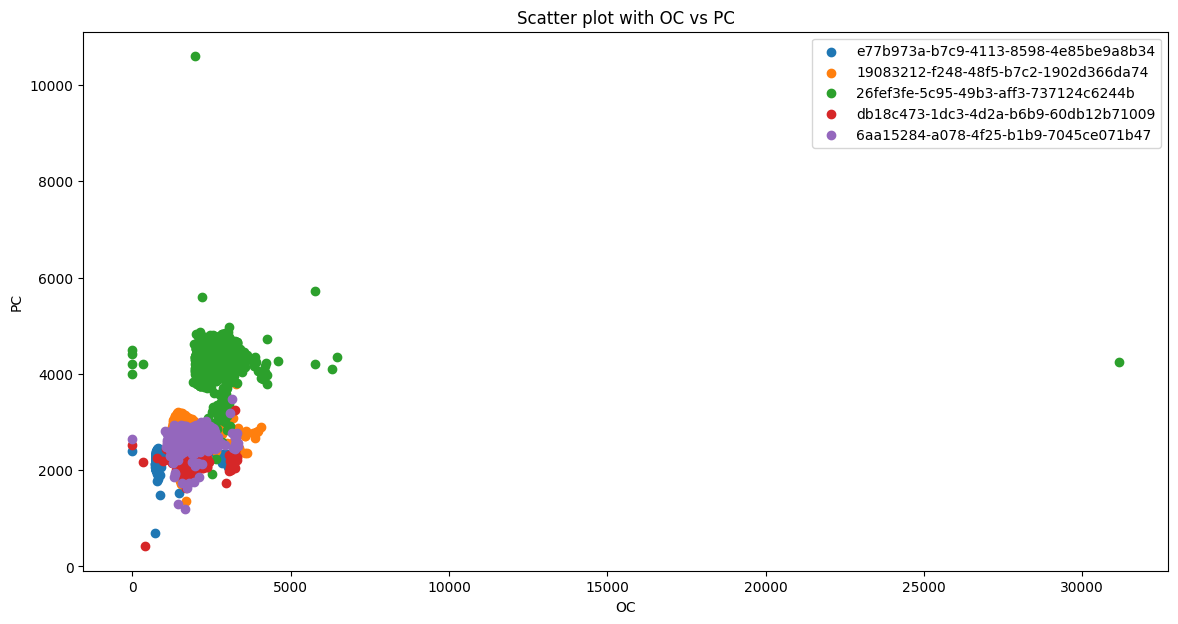

In [7]:
import matplotlib.pyplot as plt
import plotly.express as px

def matplotlib_plot(df, unique_device):
    plt.figure(figsize=(14, 7))
    for device in unique_device[:5]:  # Assuming you want to limit to first 5 devices
        sub_data_frame = df[df["DeviceID"] == device]
        plt.scatter(sub_data_frame["OC"], sub_data_frame["PC"], label=device)
    
    plt.xlabel("OC")
    plt.ylabel("PC")  # Fixed the ylabel to match 'PC'
    plt.title("Scatter plot with OC vs PC")
    plt.legend()
    plt.show()

matplotlib_plot(df,unique_device)

In [8]:
import pandas as pd
import plotly.express as px

def plotly_plot(df: pd.DataFrame, unique_device: list):
    # Create a scatter plot with Plotly Express
    fig = px.scatter(
        df[df["DeviceID"].isin(unique_device)],  # Filter the DataFrame for selected devices
        x="OC",
        y="PC",
        color="DeviceID",
        symbol="DeviceID",
        width=1400,
        height=700,
        labels={'x': "OC", 'y': "PC"},
        title="Scatter plot OC vs PC"
    )
    
    # Show the figure
    fig.show()
  # List of unique device IDs
plotly_plot(df, unique_device)


In [9]:
df=df[df["DeviceID"].isin(unique_device)]
df

,Timestamp,DeviceID,OC,PC
0,1717180257962,e77b973a-b7c9-4113-8598-4e85be9a8b34,763,2093
1,1717180333401,19083212-f248-48f5-b7c2-1902d366da74,1682,2756
2,1717180333482,26fef3fe-5c95-49b3-aff3-737124c6244b,2967,4403
3,1717180901692,db18c473-1dc3-4d2a-b6b9-60db12b71009,1634,2163
4,1717180909510,6aa15284-a078-4f25-b1b9-7045ce071b47,1951,2778
...,...,...,...,...
56341,1722449268069,19083212-f248-48f5-b7c2-1902d366da74,1612,2821
56342,1722449885930,26fef3fe-5c95-49b3-aff3-737124c6244b,2681,4321
56343,1722449885934,19083212-f248-48f5-b7c2-1902d366da74,1562,2762
56344,1722450212536,db18c473-1dc3-4d2a-b6b9-60db12b71009,1494,2478


In [10]:
from kneed import KneeLocator
def optimal_k(inertia_score):
    kneedle=KneeLocator(range(2,11),inertia_score,curve="convex", direction="decreasing")
    optimal_k=kneedle.elbow
    return optimal_k

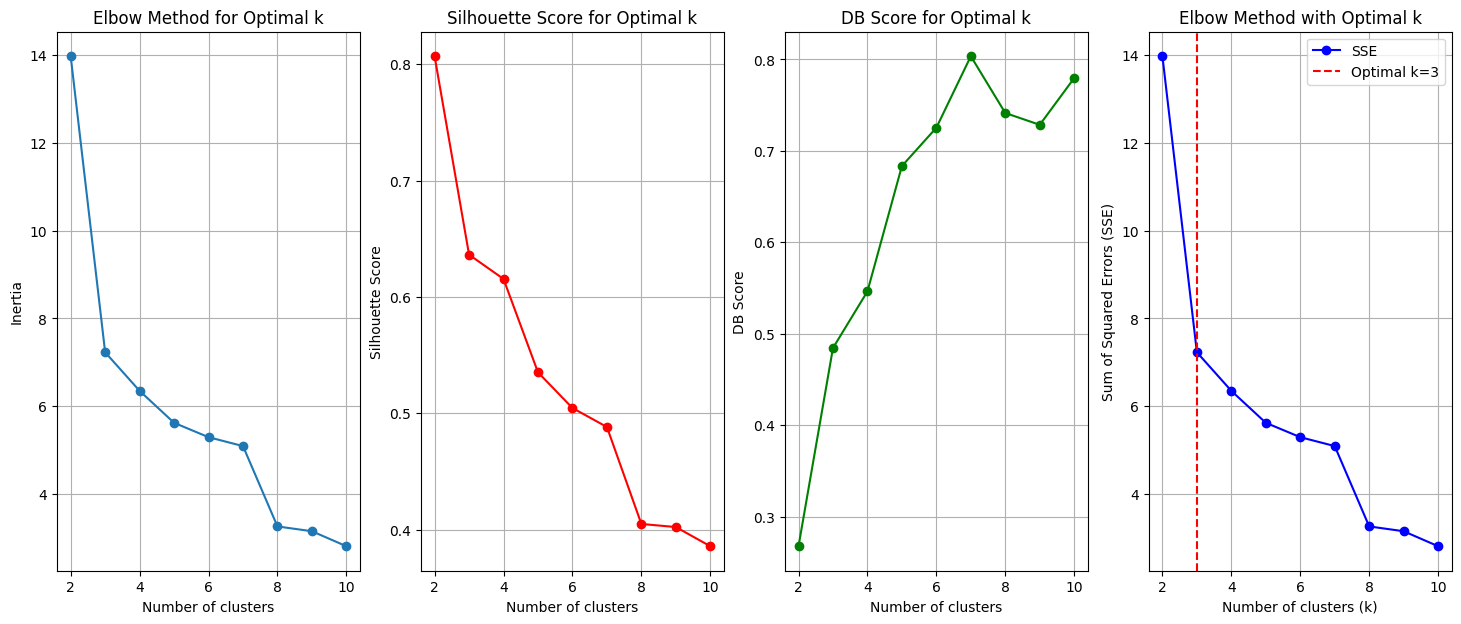

[13.980194369507428, 7.227590308613325, 6.347954549080982, 5.619345848717745, 5.291543966995494, 5.088482038533136, 3.256030417424132, 3.146553585472866, 2.804685201727607]


In [11]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score,davies_bouldin_score
def k_score(data: pd.DataFrame):
    scaler = MinMaxScaler()
    silhouette_scores = []
    inertia_scores = []
    db_scores = []
    
    # Fit KMeans for k ranging from 2 to 10
    for k in range(2, 11):
        model = KMeans(n_clusters=k, random_state=42)
        scaled_data = scaler.fit_transform(data)
        model.fit(scaled_data)
        
        # Append inertia (Elbow Method)
        inertia_scores.append(model.inertia_)
        
        # Calculate silhouette score
        score = silhouette_score(scaled_data, model.labels_)
        silhouette_scores.append(score)

        # Calculate Davies-Bouldin Score
        db_score = davies_bouldin_score(scaled_data, model.labels_)
        db_scores.append(db_score)
    
    optimal_v = optimal_k(inertia_scores)

    # Plotting the elbow curve (Inertia)
    plt.figure(figsize=(18, 7))
    
    plt.subplot(1, 4, 1)
    plt.plot(range(2, 11), inertia_scores, marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.title("Elbow Method for Optimal k")
    plt.grid(True)
    
    # Plotting the silhouette scores
    plt.subplot(1, 4, 2)
    plt.plot(range(2, 11), silhouette_scores, marker='o', color='r')
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score for Optimal k")
    plt.grid(True)

    # Plotting the Davies-Bouldin scores
    plt.subplot(1, 4, 3)
    plt.plot(range(2, 11), db_scores, marker='o', color='g')
    plt.xlabel("Number of clusters")
    plt.ylabel("DB Score")
    plt.title("DB Score for Optimal k")
    plt.grid(True)
    
    # Plotting the elbow curve with optimal k
    plt.subplot(1, 4, 4)
    plt.plot(range(2, 11), inertia_scores, 'bo-', label='SSE')
    plt.axvline(x=optimal_v, color='r', linestyle='--', label=f'Optimal k={optimal_v}')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title("Elbow Method with Optimal k")
    plt.legend()
    plt.grid(True)
    
    plt.show()
    return inertia_scores

# Example usage
data_to_cluster = df[["OC", "PC"]]
inertia_scores = k_score(data_to_cluster)
print(inertia_scores) 



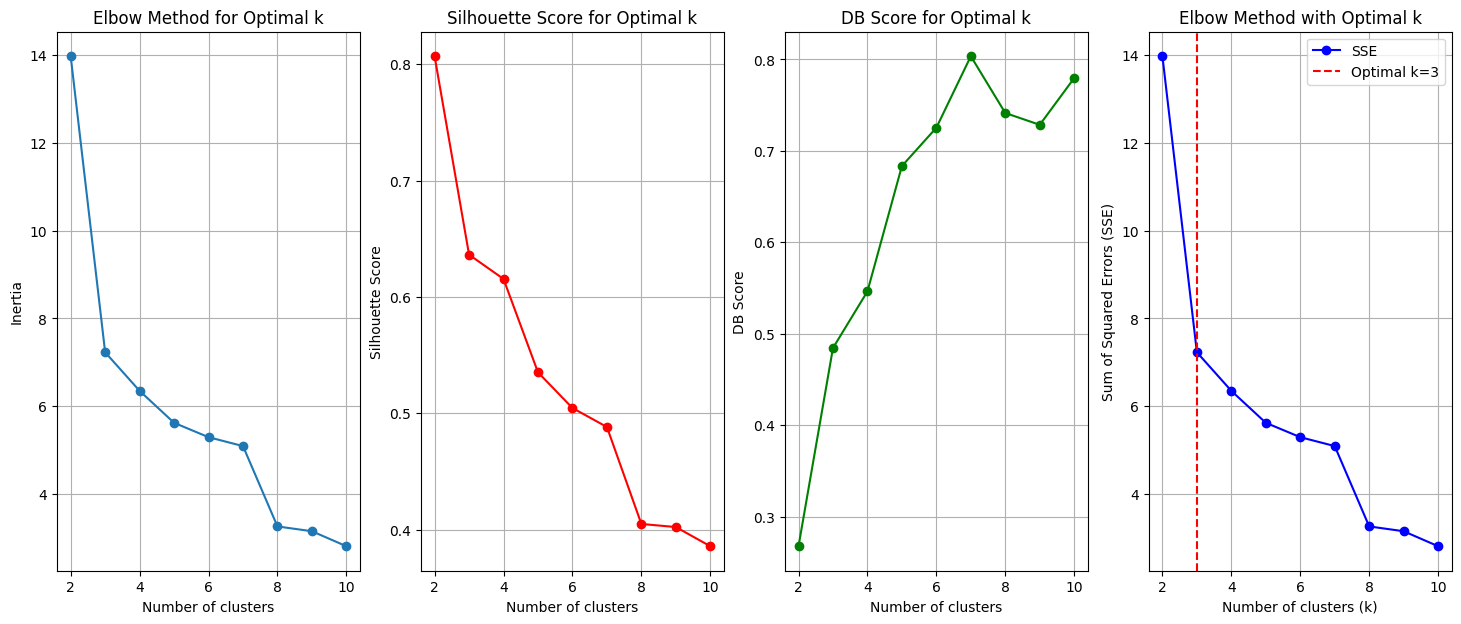

In [12]:
from util import k_score
data_to_cluster = df[["OC", "PC",]]
ine=k_score(data_to_cluster)


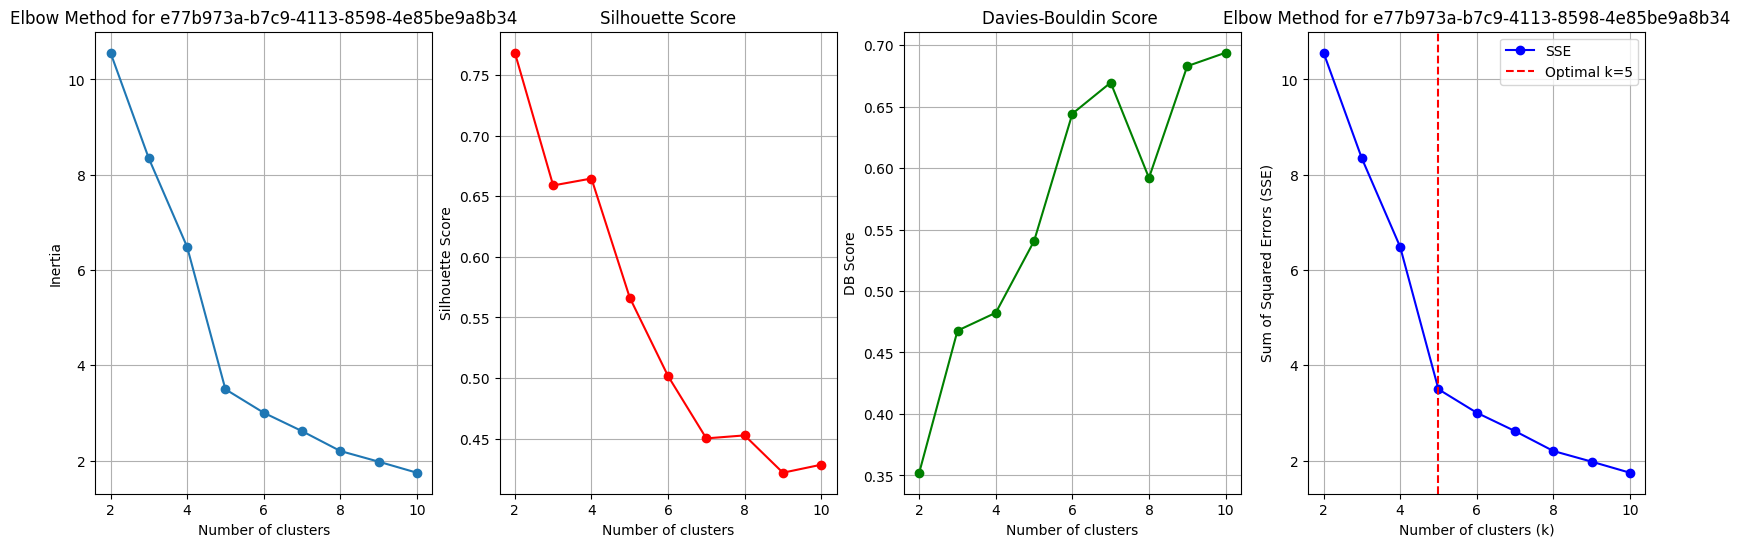

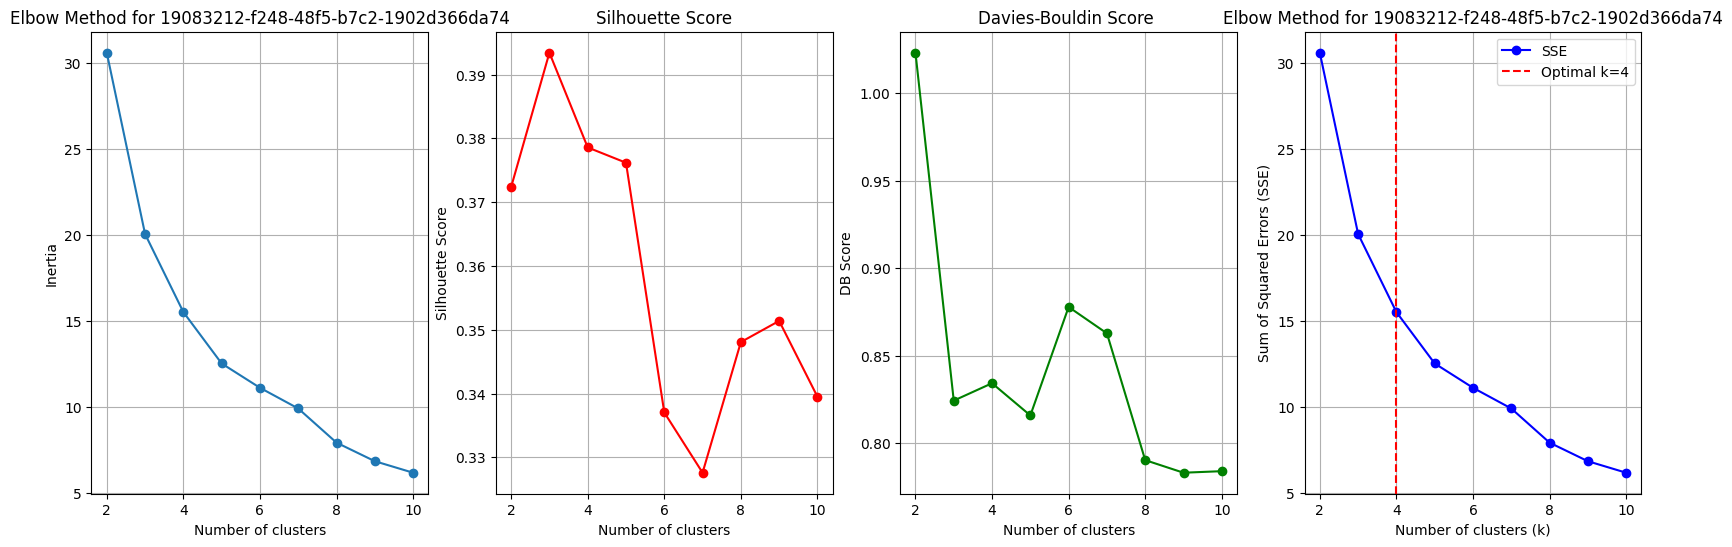

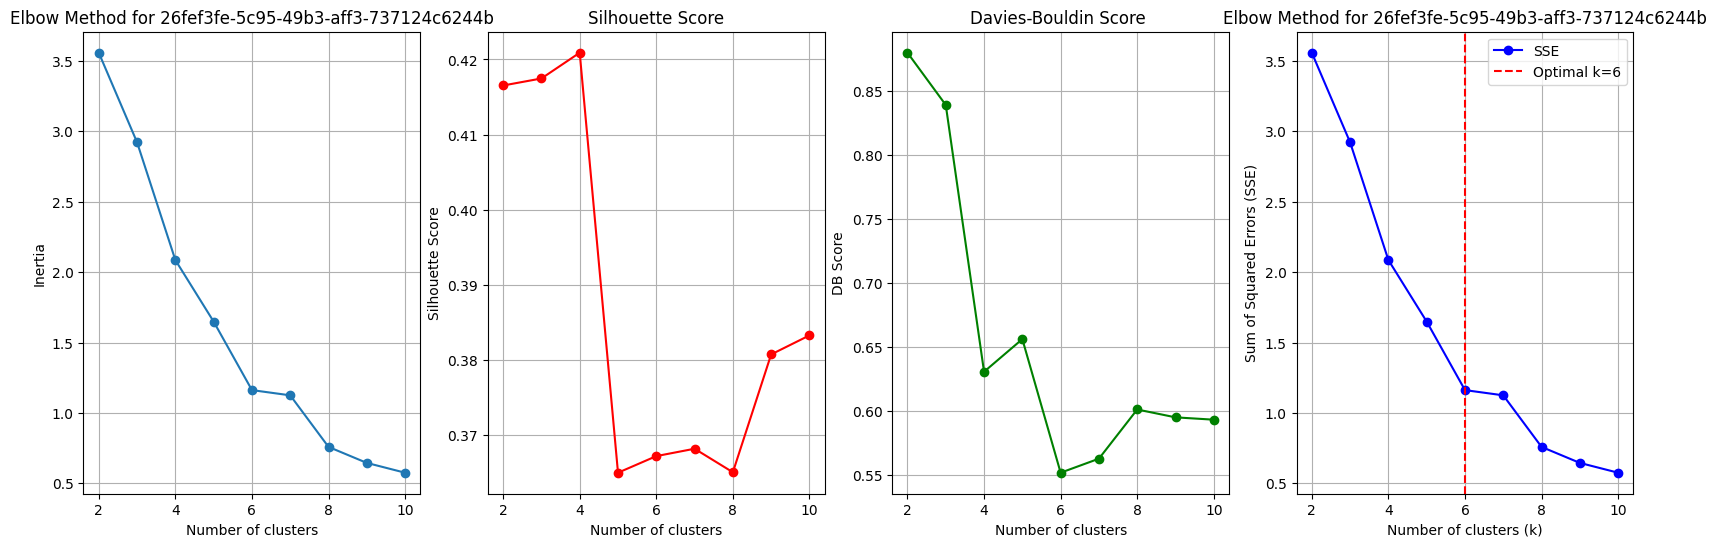

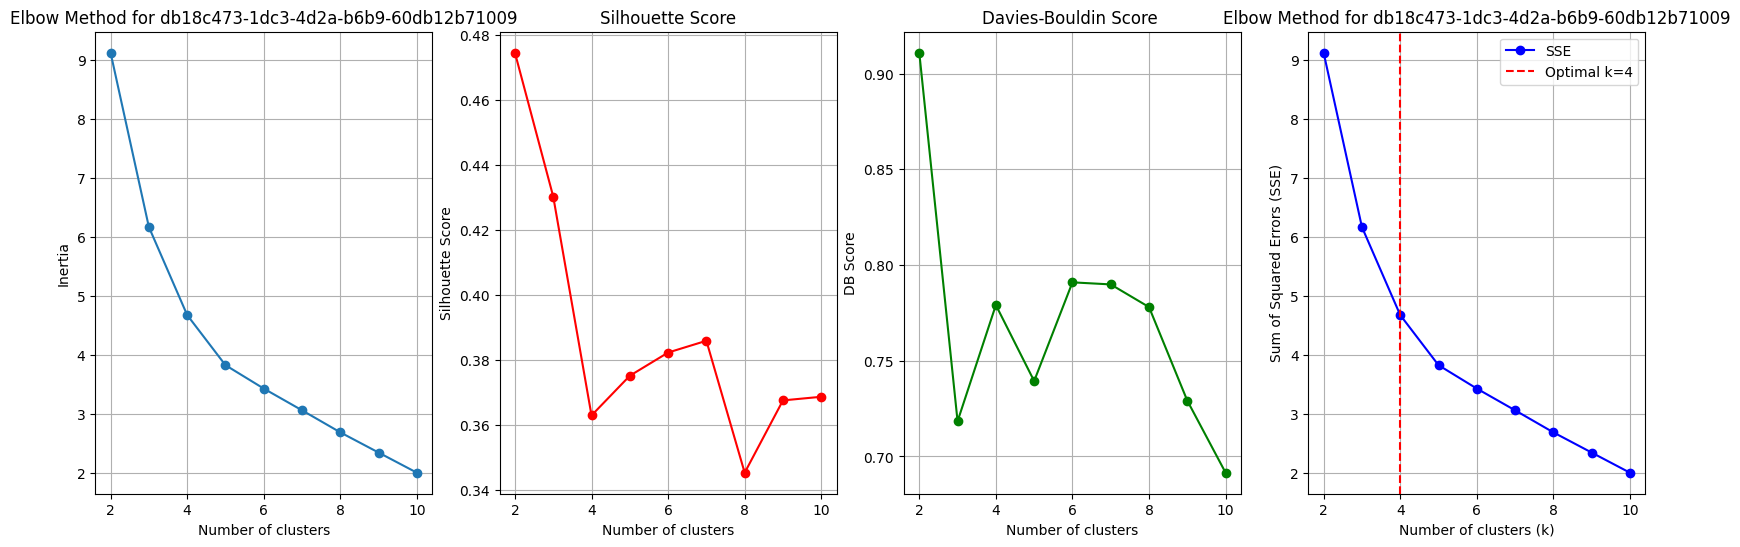

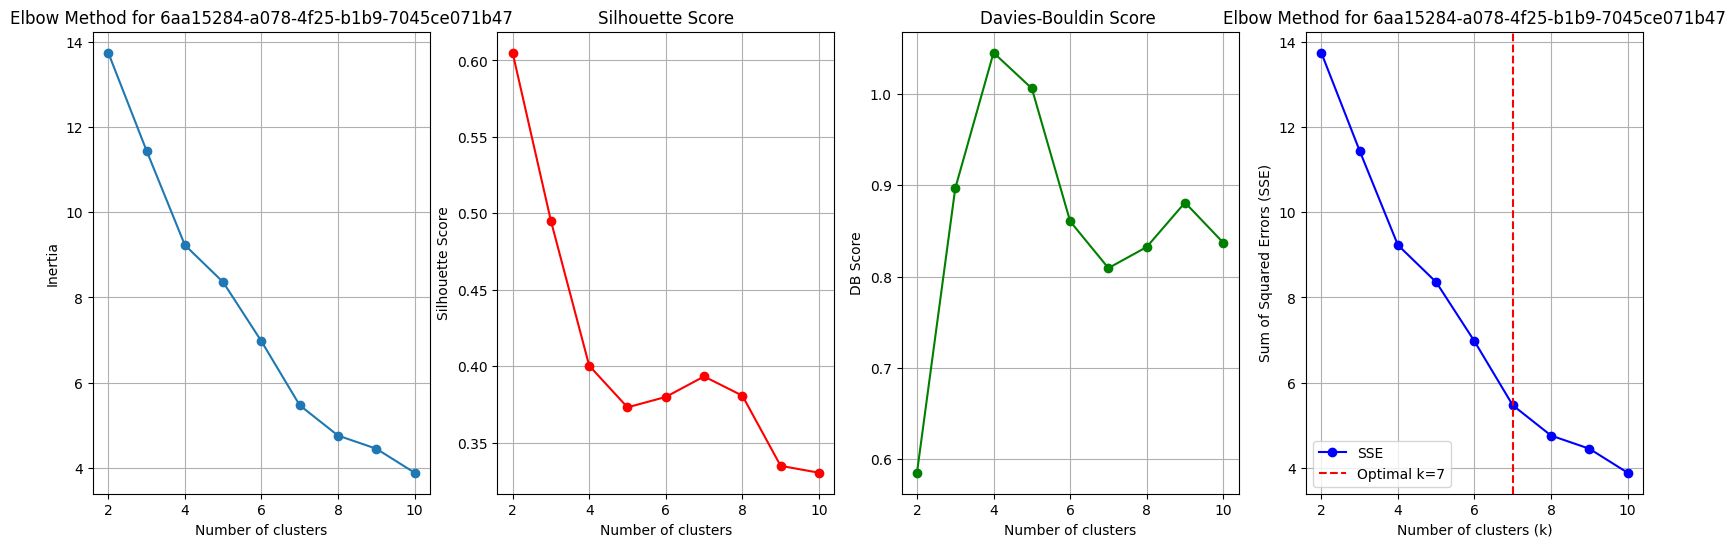

{'e77b973a-b7c9-4113-8598-4e85be9a8b34': np.int64(5), '19083212-f248-48f5-b7c2-1902d366da74': np.int64(4), '26fef3fe-5c95-49b3-aff3-737124c6244b': np.int64(6), 'db18c473-1dc3-4d2a-b6b9-60db12b71009': np.int64(4), '6aa15284-a078-4f25-b1b9-7045ce071b47': np.int64(7)}


In [13]:
from util import k_score_each_device
device_feature=["OC", "PC"]
kscore_dict= util.k_score_each_device( device_list,device_feature)
print(kscore_dict)

        


K-MEANS FOR FEATURE ["OC","OT","PC]

In [24]:
def train(df,kscore_dict,unique_device, device_feature):
    models={}
    for device in unique_device:
        scaler = MinMaxScaler()
        sub_df=df[df["DeviceID"]==device]
        if device in kscore_dict.keys():
            k=kscore_dict[device]
        model=KMeans(n_clusters=int(k))
        scalar = scaler.fit(sub_df[device_feature])
        model.fit(scalar.transform(sub_df[device_feature]))
        models[device]=model
    return models

In [25]:
models=train(df,kscore_dict,unique_device, device_feature)


{'e77b973a-b7c9-4113-8598-4e85be9a8b34': KMeans(n_clusters=5), '19083212-f248-48f5-b7c2-1902d366da74': KMeans(n_clusters=4), '26fef3fe-5c95-49b3-aff3-737124c6244b': KMeans(n_clusters=6), 'db18c473-1dc3-4d2a-b6b9-60db12b71009': KMeans(n_clusters=4), '6aa15284-a078-4f25-b1b9-7045ce071b47': KMeans(n_clusters=7)}


[0 1 3 ... 1 0 3]
[1 0 1 ... 3 3 0]
[0 4 1 ... 4 0 4]
[1 0 0 ... 0 0 0]
[5 1 5 ... 4 5 4]


In [27]:
def plot_cluster_dataset(df: pd.DataFrame, unique_device: list[int], model: KMeans):
    plt.figure(figsize=(14, 7))
    for i in range(len(model.cluster_centers_)):
        sub_df = df[df["Cluster"] == i]
        scaler=MinMaxScaler()
        scalar = scaler.fit(sub_df[device_feature])
        cluster_center = scalar.inverse_transform([model.cluster_centers_[i]])[0]
        cluster_center = [int(cluster_center[0]), int(cluster_center[1])]
        # adding cluster percentage
        cluster_center.append(int(sub_df.shape[0] / df.shape[0] * 100))
        plt.scatter(sub_df["OC"], sub_df["PC"], label=cluster_center)
    plt.xlabel("OC")
    plt.ylabel("PC")
    plt.title(f"Scatter Plot with OC vs PC [{unique_device}]")
    plt.legend()
    plt.show()


In [28]:
print(models)

{'e77b973a-b7c9-4113-8598-4e85be9a8b34': KMeans(n_clusters=5), '19083212-f248-48f5-b7c2-1902d366da74': KMeans(n_clusters=4), '26fef3fe-5c95-49b3-aff3-737124c6244b': KMeans(n_clusters=6), 'db18c473-1dc3-4d2a-b6b9-60db12b71009': KMeans(n_clusters=4), '6aa15284-a078-4f25-b1b9-7045ce071b47': KMeans(n_clusters=7)}


C:\Users\HP\AppData\Local\Temp\ipykernel_11996\3402514119.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



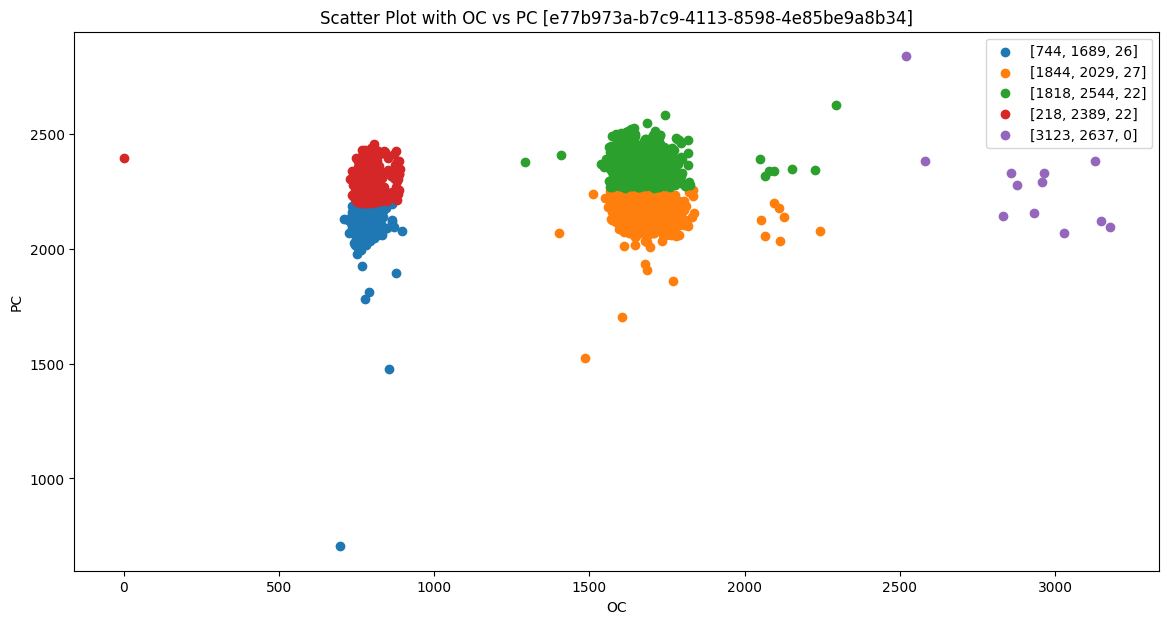

C:\Users\HP\AppData\Local\Temp\ipykernel_11996\3402514119.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



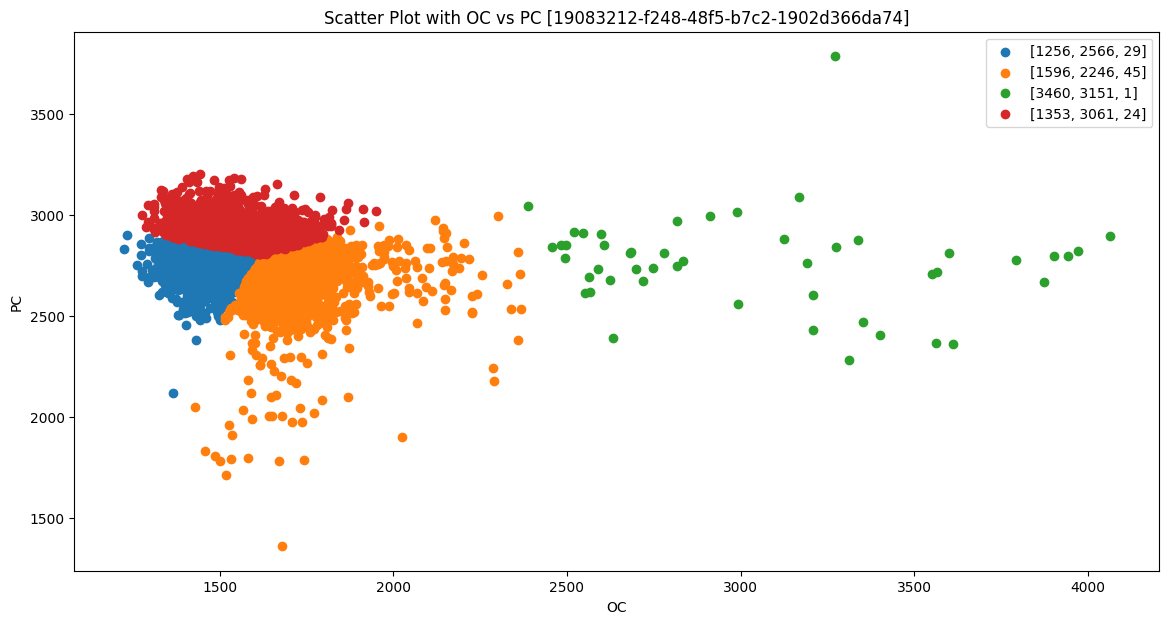

C:\Users\HP\AppData\Local\Temp\ipykernel_11996\3402514119.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



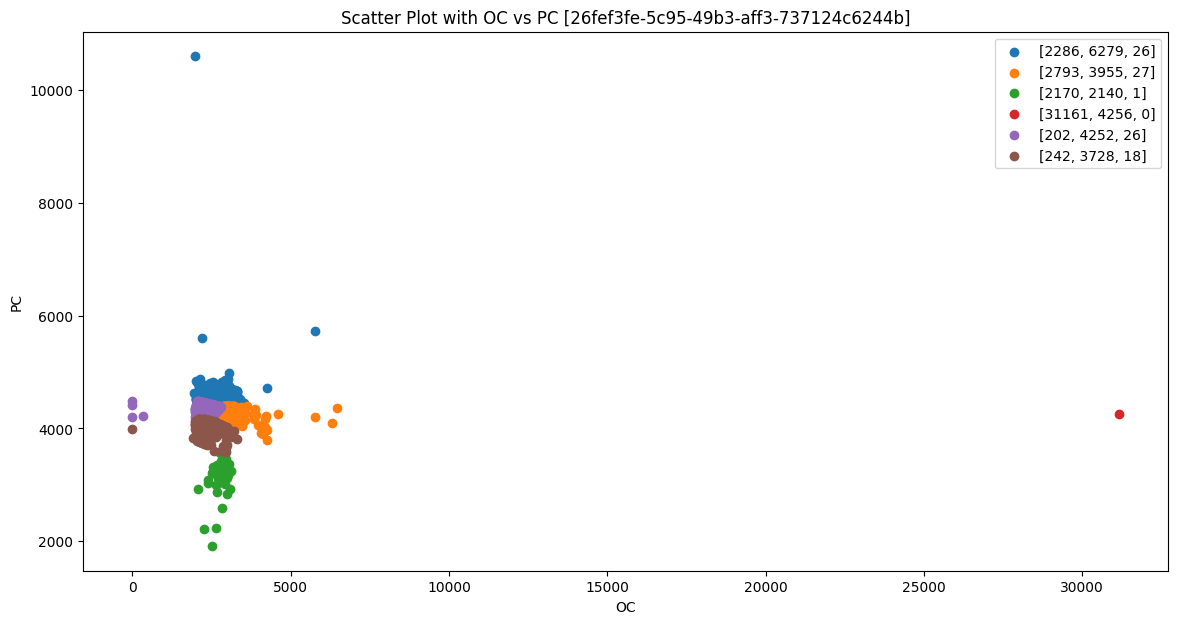

C:\Users\HP\AppData\Local\Temp\ipykernel_11996\3402514119.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



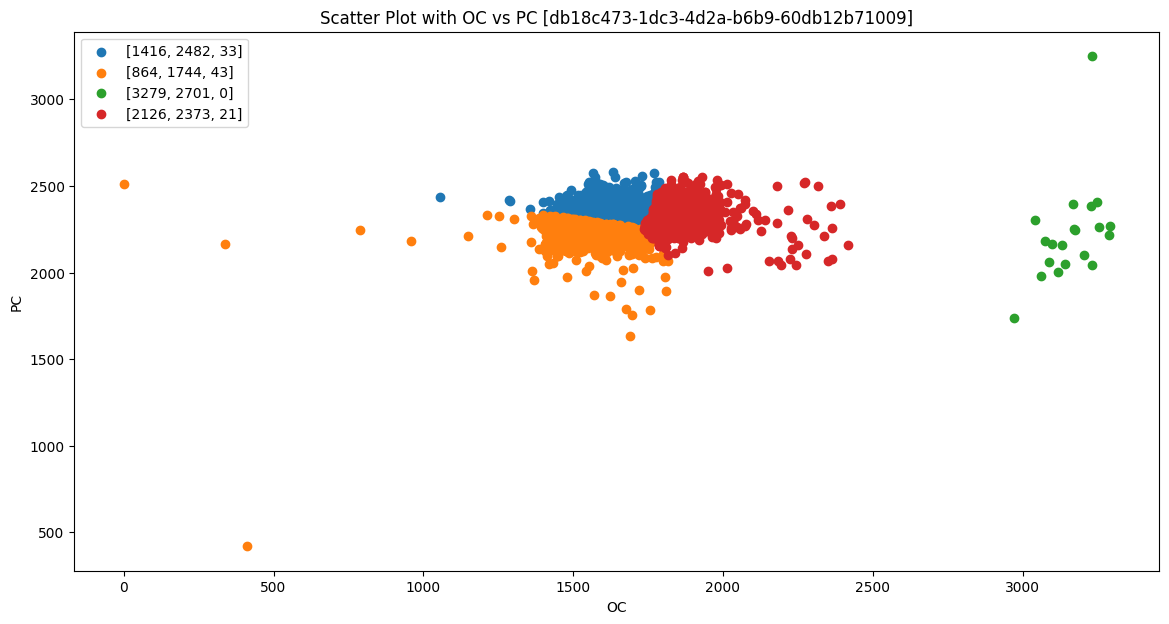

C:\Users\HP\AppData\Local\Temp\ipykernel_11996\3402514119.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



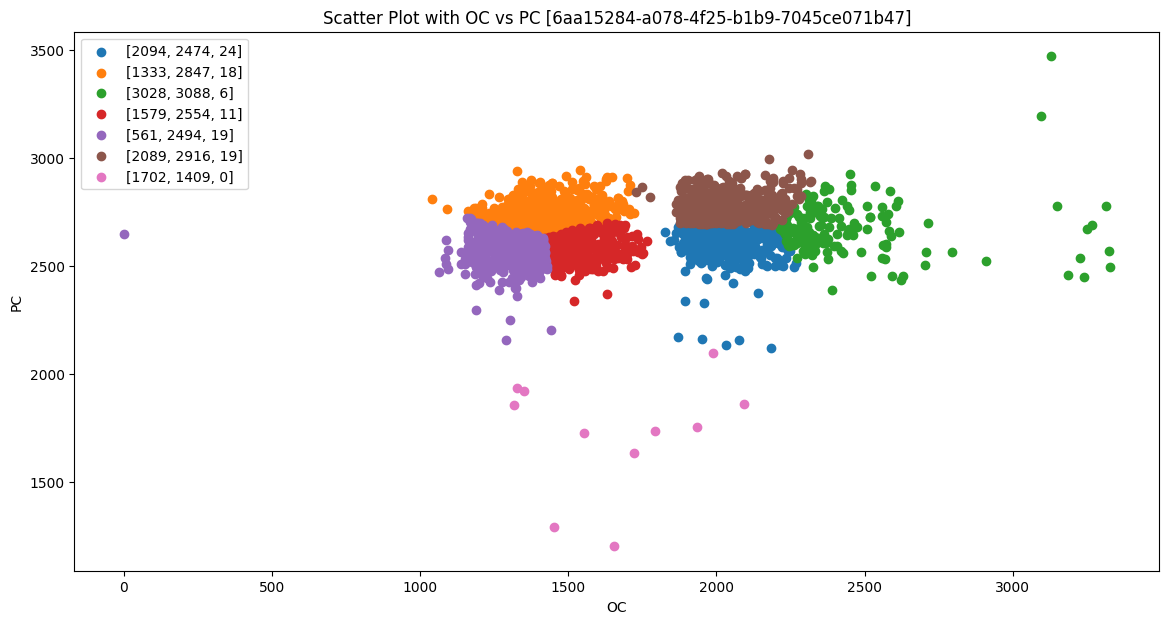

In [29]:
for device in unique_device:
    sub_df=df[df["DeviceID"]==device]
    model:KMeans=models[device]
    sub_df["Cluster"]=model.labels_
    plot_cluster_dataset(sub_df,device,model)

In [58]:
def cluster_row_count(unique_device:list[str]):
    for device in unique_device:
        sub_df=df[df["DeviceID"]==device]
        model:KMeans=models[device]
        sub_df["Cluster"]=model.labels_
        total_rows=sub_df.shape[0]
        for i in range(len(model.cluster_centers_)):
            sub=sub_df[sub_df["Cluster"]==i]
            sub_rows=sub.shape[0]
            sub_rows_percent=(100*sub_rows)/total_rows
            print(device,i,round(sub_rows_percent,1))
            
        
cluster_row_count(unique_device)
   
    
    

e77b973a-b7c9-4113-8598-4e85be9a8b34 0 26.7
e77b973a-b7c9-4113-8598-4e85be9a8b34 1 27.6
e77b973a-b7c9-4113-8598-4e85be9a8b34 2 22.5
e77b973a-b7c9-4113-8598-4e85be9a8b34 3 22.7
e77b973a-b7c9-4113-8598-4e85be9a8b34 4 0.5
19083212-f248-48f5-b7c2-1902d366da74 0 29.1
19083212-f248-48f5-b7c2-1902d366da74 1 45.5
19083212-f248-48f5-b7c2-1902d366da74 2 1.1
19083212-f248-48f5-b7c2-1902d366da74 3 24.3
26fef3fe-5c95-49b3-aff3-737124c6244b 0 26.4
26fef3fe-5c95-49b3-aff3-737124c6244b 1 27.5
26fef3fe-5c95-49b3-aff3-737124c6244b 2 1.0
26fef3fe-5c95-49b3-aff3-737124c6244b 3 0.0
26fef3fe-5c95-49b3-aff3-737124c6244b 4 26.7
26fef3fe-5c95-49b3-aff3-737124c6244b 5 18.4
db18c473-1dc3-4d2a-b6b9-60db12b71009 0 33.7
db18c473-1dc3-4d2a-b6b9-60db12b71009 1 43.8
db18c473-1dc3-4d2a-b6b9-60db12b71009 2 0.8
db18c473-1dc3-4d2a-b6b9-60db12b71009 3 21.7
6aa15284-a078-4f25-b1b9-7045ce071b47 0 24.3
6aa15284-a078-4f25-b1b9-7045ce071b47 1 18.2
6aa15284-a078-4f25-b1b9-7045ce071b47 2 6.7
6aa15284-a078-4f25-b1b9-7045ce071b47 3

C:\Users\HP\AppData\Local\Temp\ipykernel_11996\2130723802.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_11996\2130723802.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_11996\2130723802.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st